In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import datetime
import glob
from pathlib import Path
from sp00kyvectors.core import Vector

In [2]:
folder_path = Path("/Users/lila/sp00kyvectors/sp00kyvectors/notbooks/data")
all_files = glob.glob(os.path.join(folder_path, "*.csv"))
all_dfs = []
# Append the rest of the CSVs without headers
for file in all_files:
    df = pd.read_csv(file)
    all_dfs.append(df)


In [3]:
combined_df = pd.concat(all_dfs, ignore_index=True)

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66440 entries, 0 to 66439
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      66400 non-null  object 
 1   Accel_X        66366 non-null  float64
 2   Accel_Y        66352 non-null  float64
 3   Accel_Z        66350 non-null  float64
 4   Gyro_X         66322 non-null  float64
 5   Gyro_Y         66308 non-null  float64
 6   Gyro_Z         66306 non-null  float64
 7   Mag_X          66304 non-null  float64
 8   Mag_Y          66298 non-null  float64
 9   Mag_Z          66290 non-null  float64
 10  Temp_LSM9DS1   66286 non-null  float64
 11  Proximity      66288 non-null  float64
 12  Color_R        66290 non-null  float64
 13  Color_G        66280 non-null  float64
 14  Color_B        66272 non-null  float64
 15  Color_C        66272 non-null  float64
 16  BME680_Temp    66256 non-null  float64
 17  Gas            66242 non-null  float64
 18  Humidi

In [5]:
len(combined_df)

66440

In [6]:
combined_df['Timestamp'].unique()

array([8.75115045385, 8.755337893399998, 8.772685857249998, ...,
       8.5758761984, 0.36666, 8.60638468655], dtype=object)

In [7]:
df = combined_df[~combined_df['Timestamp'].apply(lambda x: isinstance(x, float))]


In [8]:
print(df.shape)
df.describe()

(47439, 23)


,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Temp_LSM9DS1,...,Color_G,Color_B,Color_C,BME680_Temp,Gas,Humidity,Pressure,GPS_Latitude,GPS_Longitude,GPS_Speed
count,47396.000000,47384.000000,47378.000000,47363.000000,47355.000000,47355.000000,47353.000000,47353.000000,47348.000000,47347.000000,...,47344.000000,47340.000000,47340.000000,4.733000e+04,4.732000e+04,47310.000000,39388.000000,15048.000000,15831.000000,23575.000000
mean,17.202692,4.749788,1.744653,1.530412,0.654426,5.732938,2.330251,0.294059,12.927098,17.713353,...,791.089878,1274.856485,1225.250282,1.936133e+04,2.993100e+04,438.014002,741.373165,-43.121454,-18.287783,0.803316
std,634.233790,240.057681,193.743626,155.422576,86.496272,556.642091,329.766229,59.814818,499.816735,560.629430,...,1660.935081,2778.265866,3522.473881,1.341588e+05,2.949441e+05,473.352243,438.167919,50.864577,32.669949,0.486890
min,-73.991496,-73.991655,-73.991791,-73.991790,-0.693140,-0.691320,-73.991413,-0.722400,-0.726460,-73.991746,...,-73.991453,-73.991621,-125.089531,-1.250895e+02,-7.399175e+01,0.000000,-291.345546,-73.999346,-74.008596,0.000000
25%,4.261617,-0.022732,0.003665,-0.014050,-0.013897,0.013286,-0.210980,-0.675640,-0.686280,0.000000,...,0.000000,0.000000,3.000000,2.260871e+01,5.514773e+01,52.781611,40.689423,-73.991583,-73.990776,0.790352
50%,8.734999,4.179663,0.106481,0.000916,-0.011148,0.016035,0.357140,-0.229460,-0.670390,19.500000,...,95.000000,137.000000,24.035859,2.429602e+01,1.538600e+04,61.800994,1013.356508,-73.991410,0.400000,0.800597
75%,8.752347,4.201796,0.130409,0.003665,0.011606,0.362740,0.370020,-0.217420,20.500000,20.500000,...,812.000000,1119.000000,549.000000,2.934700e+04,2.443900e+04,1017.753814,1014.678887,40.688788,0.960000,0.810148
max,76482.000000,45952.000000,40181.000000,22095.000000,16817.000000,76551.000000,69319.000000,10610.000000,86432.000000,89267.000000,...,70536.000000,47429.000000,81270.000000,1.038462e+07,1.288783e+07,1254.215705,1254.215705,40.708798,10.620000,12.560000


In [9]:
humidity = Vector(label='Humidity', data_points=df['Humidity'])
humidity.drop_na()
humidity.drop_outliers()

AttributeError: 'Vector' object has no attribute 'drop_na'

In [ ]:
df = df.sort_values(by='Timestamp')

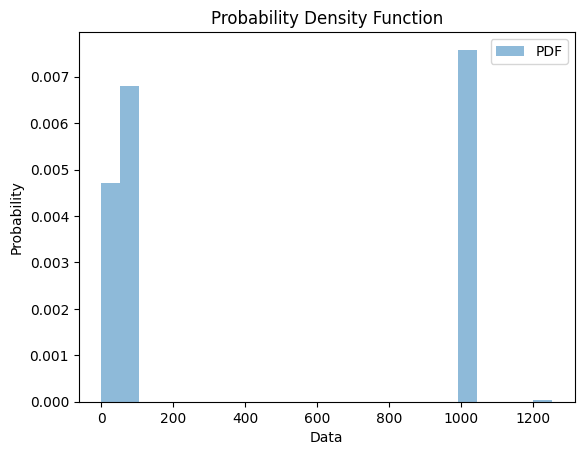

In [ ]:
humidity.plot_pdf()

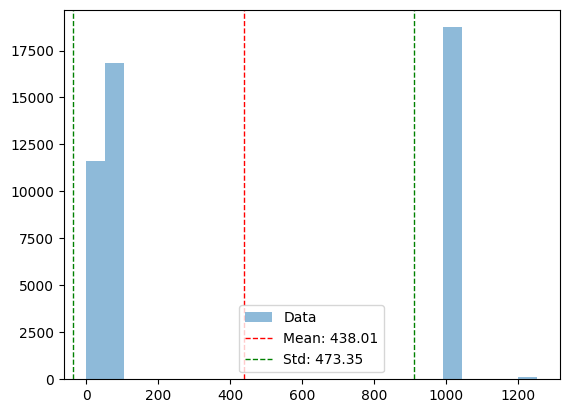

In [ ]:
humidity.plot_basic_stats()

In [ ]:
# plt.figure(figsize=(10, 5))
# plt.plot(df['Timestamp'], df['Humidity'], marker='o', linestyle='-')
# plt.xlabel('Time')
# plt.ylabel('Humidity')
# plt.title('Humidity Over Time')


In [ ]:
#plt.show()

In [ ]:
#df = df[ (df['Humidity'] < 100) & (df['Humidity'] >= 5)]

In [ ]:
#df.head()

In [ ]:
#plt.plot(df['Timestamp'], df['Humidity'], marker='x')

In [ ]:
plt.show()